In [3]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [5]:
data.sample(10)

,headlines,text
45965,Scientists set record for fastest distance mea...,Germany and France-based researchers have reco...
76844,What benefits are freedom fighters entitled to?,A Central scheme grants pension and other bene...
66158,NASA running out of plutonium for deep space m...,The US government has acknowledged that the De...
19613,Nick Jonas' mom dances to Punjabi song at Priy...,"Denise Jonas, mother of Priyanka Chopra's fian..."
19070,"Man, son drown while cleaning manhole in Mahar...",A 45-year-old man and his 21-year-old son drow...
80225,Saving one tiger yields capital benefit of Ã¢Â...,An economic valuation of tiger reserves in Ind...
91409,Subhash Ghai shares video of late actor Vinod ...,Filmmaker Subhash Ghai has shared a 2016 video...
4349,Agitations are uncalled for: Madhur on 'The Ac...,"Madhur Bhandarkar, while talking about the agi..."
40020,Nipah virus no longer a threat in Kerala: Medi...,Indian Medical Association President Ravi Wank...
90981,"Warner, Dhawan 1st to add 2,000 runs for any w...",Sunrisers Hyderabad openers Shikhar Dhawan and...


## Step 2. 데이터 전처리하기

### 중복값과 결측치 확인하기

In [7]:
print(len(data))

98401


In [6]:
print(data['headlines'].nunique())
print(data['text'].nunique())

98280
98360


In [9]:
# 중복을 제거해줍니다.
data.drop_duplicates(subset = ['text'], inplace=True)
print(len(data))

98360


In [10]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

### 텍스트 정규화와 불용어 제거

In [11]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


In [12]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aiffel0039/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

print("불용어의 개수 : ", len(stopwords.words('english')))
print(stopwords.words('english'))

불용어의 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

In [19]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower()
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    
    return tokens

In [20]:
from tqdm.notebook import tqdm

clean_text = []
for s in tqdm(data['text']):
    clean_text.append(preprocess_sentence(s))
    
print("슝=3")


슝=3


In [21]:
clean_text[:5]

['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers',
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit',
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history',
 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical il

In [22]:
clean_summary = []
for s in tqdm(data['headlines']):
    clean_summary.append(preprocess_sentence(s))

print("슝=3")


슝=3


In [23]:
clean_summary[:5]

['upgrad learner switches career ml al salary hike',
 'delhi techie wins free food swiggy one year cred',
 'new zealand end rohit sharma led india match winning streak',
 'aegon life iterm insurance plan helps customers save tax',
 'known hirani yrs metoo claims true sonam']

In [26]:
data['headlines'] = clean_summary
data['text'] = clean_text

In [28]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [29]:
print("전체 샘플 수 :", len(data))

전체 샘플 수 : 98360


### 샘플의 최대 길이 정하기

In [30]:
text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print("텍스트의 최소 길이 : ", np.min(text_len))
print("텍스트의 최대 길이 : ", np.max(text_len))
print("텍스트의 평균 길이 : ", np.mean(text_len))

print("헤드라인의 최소 길이 : ", np.min(summary_len))
print("헤드라인의 최대 길이 : ", np.max(summary_len))
print("헤드라인의 평균 길이 : ", np.mean(summary_len))

텍스트의 최소 길이 :  1
텍스트의 최대 길이 :  60
텍스트의 평균 길이 :  35.09968483123221
헤드라인의 최소 길이 :  1
헤드라인의 최대 길이 :  13
헤드라인의 평균 길이 :  7.136183407889386


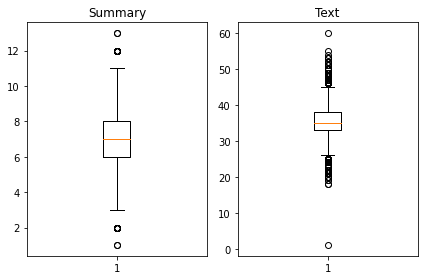

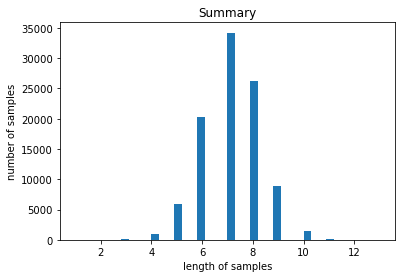

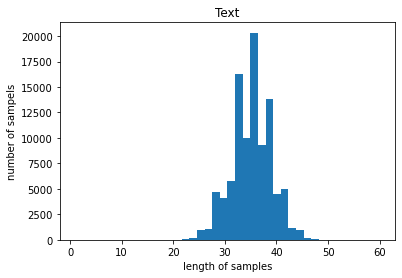

In [32]:
plt.subplot(1, 2, 1)
plt.boxplot(summary_len)
plt.title("Summary")

plt.subplot(1, 2, 2)
plt.boxplot(text_len)
plt.title("Text")
plt.tight_layout()

plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of sampels')
plt.show()

임의로 텍스트와 헤드라인의 길이를 정해줍시다. 

In [31]:
text_max_len = 45
summary_max_len = 10

In [33]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if len(s.split()) <= max_len:
            cnt = cnt + 1
    print("전체 샘플 중 길이가 {} 이하인 샘플의 비율 : {}".format(max_len, (cnt/len(nested_list))))

In [34]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len, data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율 : 0.9998576657177715
전체 샘플 중 길이가 10 이하인 샘플의 비율 : 0.9978344855632371


거의 모든 데이터를 확보할 수 있네요!

In [35]:
data = data[data['text'].apply(lambda x : len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x : len(x.split()) <= summary_max_len)]

print("전체 샘플의 수 : ", len(data))

전체 샘플의 수 :  98134


### 시작 토큰과 종료 토큰 추가하기

In [36]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken ' + x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken


In [37]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 numpy 타입으로 저장해줍니다.
encoder_input = np.array(data['text']) 
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

훈련 데이터와 테스트 데이터를 분리합시다.

In [39]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[10910 20856 35688 ... 88741 47245 87020]


In [40]:
encoder_iput = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [41]:
n_of_val = int(len(encoder_input) * 0.2)
print("테스트 데이터의 수 : ", n_of_val)

테스트 데이터의 수 :  19626


In [42]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print("훈련 데이터의 갯수 :", len(encoder_input_train))
print("훈련 레이블의 갯수 :", len(decoder_input_train))
print("테스트 데이터의 갯수 :", len(encoder_input_test))
print("테스트 데이터의 갯수 :", len(decoder_input_test))

훈련 데이터의 갯수 : 78508
훈련 레이블의 갯수 : 78508
테스트 데이터의 갯수 : 19626
테스트 데이터의 갯수 : 19626


### 정수 인코딩

단어집합 만들기 및 정수 인코딩

In [43]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [44]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도 수가 threshold보다 작으면
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
    

print("단어 집합(vocabulary)의 크기 : ", total_cnt)
print("등장 빈도가 {}번 이하인 희귀 단어의 수 : {}".format(threshold-1, rare_cnt))
print("단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : ", total_cnt - rare_cnt)
print("단어 집합에서 희귀 단어의 비율 : ", (rare_cnt/total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도의 비율 : ", (rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기 :  68024
등장 빈도가 6번 이하인 희귀 단어의 수 : 46175
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 :  21849
단어 집합에서 희귀 단어의 비율 :  67.8804539574268
전체 등장 빈도에서 희귀 단어 등장 빈도의 비율 :  3.428187252876184


In [45]:
src_vocab = 5000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 5000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [46]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1659, 1736, 1994, 1397, 627, 1741, 2323, 1284, 877, 22, 141, 1229, 1659, 2551, 605, 349, 958, 132, 3386, 2313, 1829, 1543, 2170, 211, 326, 1994, 2186, 62], [239, 1274, 1050, 543, 1429, 413, 600, 101, 2361, 223, 376, 345, 17, 2, 26, 3697, 2977, 2638, 4715, 101, 117, 17, 3521, 124, 2639, 543, 533, 100, 4470, 3674, 38, 2552], [25, 716, 831, 3, 698, 601, 272, 4671, 72, 223, 7, 89, 88, 89, 272, 144, 3, 262, 118, 89, 808, 237, 1303, 1304, 164, 409, 89, 1680, 3, 481, 2468, 2671, 321, 272, 115, 475]]


headline 데이터에 대해서도 한번 토크나이저를 생성합시다.

In [47]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [48]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29874
등장 빈도가 5번 이하인 희귀 단어의 수: 19587
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10287
단어 집합에서 희귀 단어의 비율: 65.56537457320746
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.885922425242137


In [49]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)

decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환 되었는지 확인
print("input!")
print("input : ", decoder_input_train[:5])
print("output!")
print("ouput : ", decoder_target_train[:5])

input!
input :  [[1, 298, 7, 254, 995, 967, 411], [1, 91, 83, 6], [1, 1262, 25, 1981, 38, 264], [1, 134, 279, 537, 292, 221], [1, 765, 597, 666, 78]]
output!
ouput :  [[298, 7, 254, 995, 967, 411, 2], [91, 83, 6, 2], [1262, 25, 1981, 38, 264, 2], [134, 279, 537, 292, 221, 2], [765, 597, 666, 78, 2]]


In [50]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print("삭제할 훈련 데이터의 갯수 : ", len(drop_train))
print("삭제할 테스트 데이터의 갯수 : ", len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print("---")
print("훈련 데이터의 갯수 : ", len(encoder_input_train))
print("훈련 레이블의 갯수 : ", len(decoder_input_train))
print("테스트 데이터의 갯수 : ", len(encoder_input_test))
print("테스트 레이블의 갯수 : ", len(decoder_input_test))

삭제할 훈련 데이터의 갯수 :  249
삭제할 테스트 데이터의 갯수 :  54
---
훈련 데이터의 갯수 :  78259
훈련 레이블의 갯수 :  78259
테스트 데이터의 갯수 :  19572
테스트 레이블의 갯수 :  19572


훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있습니다.

### 패딩하기

In [51]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')

decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 모델 설계하기


In [52]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape = (text_max_len, ))

# 인코더 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

In [53]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 lstm
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout=0.4, recurrent_dropout = 0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [54]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

### 어텐션 메커니즘 적용

In [55]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [56]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name = 'attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하과 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

## 모델 훈련하기

In [57]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 2)
history = model.fit(
    x = [encoder_input_train, decoder_input_train],
    y = decoder_target_train,
    validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size = 256,
    callbacks = [es],
    epochs = 50
)

Epoch 1/50
306/306 [==============================] - 330s 1s/step - loss: 3.6593 - val_loss: 3.5142
Epoch 2/50
306/306 [==============================] - 336s 1s/step - loss: 3.4808 - val_loss: 3.4392
Epoch 3/50
306/306 [==============================] - 333s 1s/step - loss: 3.4007 - val_loss: 3.3566
Epoch 4/50
306/306 [==============================] - 332s 1s/step - loss: 3.3036 - val_loss: 3.2688
Epoch 5/50
306/306 [==============================] - 299s 976ms/step - loss: 3.2208 - val_loss: 3.2078
Epoch 6/50
306/306 [==============================] - 302s 988ms/step - loss: 3.1615 - val_loss: 3.1706
Epoch 7/50
306/306 [==============================] - 298s 973ms/step - loss: 3.1185 - val_loss: 3.1468
Epoch 8/50
306/306 [==============================] - 303s 991ms/step - loss: 3.0780 - val_loss: 3.1227
Epoch 9/50
306/306 [==============================] - 304s 994ms/step - loss: 3.0442 - val_loss: 3.1070
Epoch 10/50
306/306 [==============================] - 287s 939ms/step - los

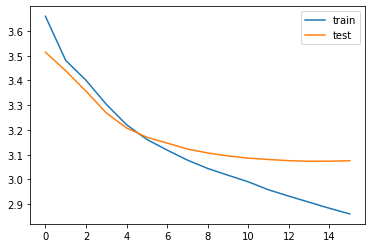

In [58]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

## 인퍼런스 모델 구현하기

In [59]:
src_index_to_word = src_tokenizer.index_word 
tar_word_to_index = tar_tokenizer.word_index
tar_index_to_word = tar_tokenizer.index_word

In [60]:
# 인ㄴ코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점들의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [61]:
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis = -1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

In [62]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence = ""
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if sampled_token != 'eostoken':
            decoded_sentence += ' ' + sampled_token
        
        # <EOS>에 도달하거나 최대 길이를 넘으면 중단
        if sampled_token == 'eostoken' or len(decoded_sentence.split()) >= summary_max_len - 1:
            stop_condition = True
        
        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros([1, 1])
        target_seq[0, 0] = sampled_token_index
        
        # 상태 업데이트
        e_h, e_c = h, c
    
    return decoded_sentence

In [63]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        if i != 0:
            temp = temp + src_index_to_word[i] + ' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ""
    for i in input_seq:
        if i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']:
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [64]:
for i in range(50, 100):
    print("원문 : ", seq2text(encoder_input_test[i]))
    print("실제 요약 : ", seq2summary(decoder_input_test[i]))
    print("예측 요약 : ", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  brihanmumbai municipal corporation denied ganesh committee demand take approval process setting online committee claimed single window clearance system introduced improve approval rate reportedly meet mayor demand better clearance system 
실제 요약 :  former thai pm sentenced years prison 
예측 요약 :   man city beat arsenal win win


원문 :  year old student singh happy punjab allegedly got girlfriend raped could use avoid according reports two happy friends took abandoned raped day supposed meet parents reports added 
실제 요약 :  kumar wins rd straight games gold 
예측 요약 :   man city beat arsenal win


원문 :  mumbai residents protesting outside brihanmumbai municipal corporation office every monday friday since july complaints resolved months complaints filed public registration system set complaints include illegal issues tree cutting among others 
실제 요약 :  new zealand flight takes lands 
예측 요약 :   india beat pakistan hockey team


원문 :  north korean officials said care us ban citizens trave

예측 요약 :   man arrested raping year old girl


원문 :  german carmaker rejected reports emissions tests illegal systems cars company also denied reports volkswagen diesel emissions treatment systems vehicle emissions came worldwide since volkswagen admitted illegal software us emissions tests diesel cars 
실제 요약 :  jd cong alliance bjp stake claim form karnataka govt 
예측 요약 :   india first ever


원문 :  australian captured footage rare called caused instead going towards ground travel space observed australia new south 
실제 요약 :  times star scene oscar 
예측 요약 :   india first ever


원문 :  reportedly stopped oil disputed area south china sea china threatened attack islands stop china claims islands calls islands notably several countries including philippines others dispute china claim region 
실제 요약 :  woman man refuses give metro seat 
예측 요약 :   india first ever win


원문 :  russian lawmakers urged president vladimir putin bill soviet legislation part de law states cannot pay tribute persons o

예측 모델이 india에 꽂혀서 계속 나옵니다... 추상적인 방법으로는 잘 되는 것 같지가 않아요.

추출적 방법으로 한번 도전해봅시다.

---

# 추출적 요약

In [94]:
from summa.summarizer import summarize

for i in range(50, 100):
    print("Summary", i+1)
    print("원문 : ", data['text'][i])
    print("요약 : ", data['headlines'][i])
    print("추출적 요약 : ", summarize(data['text'][i], ratio = 0.4))
    print("\n")

Summary 51
원문 :  former finance minister yashwant sinha tuesday demanded probe alleged diversion loans worth crore dewan housing finance agencies including regulators government failed track nefarious deals said comes media report tuesday accused dhfl controlling shareholders diverting funds shell companies buy assets
요약 :  yashwant sinha demands probe alleged fund diversion dhfl
추출적 요약 :  


Summary 52
원문 :  us based boeing wednesday reported annual sales worth billion first time planemaker sales crossed billion mark year history company said expects deliver commercial aircraft boeing retained position world largest planemaker seventh straight year delivering aircraft
요약 :  boeing sales cross bn st time yr history
추출적 요약 :  


Summary 53
원문 :  text
요약 :  headlines
추출적 요약 :  


Summary 54
원문 :  oneplus emerged india best selling premium smartphone brand per report counterpoint captured market share premium segment oneplus emerged highest selling premium smartphone followed oneplus
요약 :